#**Confronto sperimentale degli algoritmi di ordinamento visti a lezione**#

In questo Colab implementeremo e valuteremo empiricamente i vari algoritmi di ordinamento che abbiamo visto a lezione

In [ ]:
import matplotlib.pyplot as plt
from random import shuffle
from time import time
from tqdm import tqdm
from statistics import mean, stdev


##**Sorting algorithms**##
Per prima cosa implementiamo gli algoritmi di ordinamento che abbiamo visto a lezione

###*Insertion Sort*###
Insertion sort ordina una lista in $O(n^2)$

In [ ]:
def insertionSort(arr):
    # Traverse through 1 to len(arr)
    for i in range(1, len(arr)):
        key = arr[i]
        # Move elements of arr[0..i-1], that are greater than key,
        # to one position ahead of their current position
        j = i-1
        while j >=0 and key < arr[j]:
                arr[j + 1] = arr[j]
                j -= 1
        arr[j + 1] = key
    return

###*Selection Sort*###
Selection sort ordina una lista in $O(n^2)$

In [ ]:
def selectionSort(array):
    '''
    Implementation of selection sort
    '''
    n, current = len(array), 0
    while current < n:
        for i in range(current,n):
            if array[i] < array[current]: array[i], array[current] = array[current], array[i]
        current += 1
    return

###*Merge Sort*###
Merge sort ordina una lista in $O(n \log n)$. Nota bene: si tratta di un algoritmo ricorsivo con profondità di ricorsione $O(\log n)$ che utilizza memoria ausiliaria.

In [ ]:
def merge(left, right):
    '''
        the merge function merges the two sorted lists left and right
    '''
    result = []
    i,j = 0,0
    while i < len(left) and j < len(right):
        if left[i] < right[j]:     # the element on the left is smaller
            result.append(left[i]) # append it to result
            i += 1
        else:
            result.append(right[j])# if the element on the right is smaller appendit to result
            j += 1
    # When one of the two lists is exhausted just append the remaining part of the other
    while (i < len(left)):
        result.append(left[i])
        i += 1
    while (j < len(right)):
        result.append(right[j])
        j += 1
    return result

def mergeSort(array):
    '''
        The merge sort function
    '''
    if len(array) < 2: #Base case of the recursion
        return array[:]
    else:
        middle = len(array)//2
        left = mergeSort(array[:middle]) #call mergesort on the left
        right = mergeSort(array[middle:]) #call mergesort on the right
        return merge(left, right)

###*Heapsort*###
Heapsort ordina una lista in $O(n \log n)$. Si tratta di un algoritmo che ordina in place e la sua funzione heapify è ricorsiva, con profondità massima $O(\log n)$.

In [ ]:
## Si tratta dello stesso codice che avete studiato in classe e che potete trovare su Classroom, ho solo cambiato un po' spazi e commenti

def heapSort(arr):
    '''
        the heapSort function sorts arr using heapsort
    '''
    n = len(arr)

    # Build a max heap.
    for i in range(n // 2 - 1, -1, -1):
        heapify(arr, n, i)

    # One by one extract elements
    for i in range(n-1, 0, -1):
        arr[i], arr[0] = arr[0], arr[i]  # swap
        heapify(arr, i, 0)

def heapify(arr, n, i):
    '''
        The heapify function
    '''
    largest = i  # Initialize largest as root
    left = 2 * i + 1  # left = 2*i + 1
    right = 2 * i + 2  # right = 2*i + 2

    # See if left child of root exists and is greater than root
    if left < n and arr[left] > arr[largest]:
        largest = left

    # See if right child of root exists and is greater than root
    if right < n and arr[right] > arr[largest]:
        largest = right

    # Change root, if needed
    if largest != i:
        arr[i], arr[largest] = arr[largest], arr[i]  # swap

        # Heapify the root.
        heapify(arr, n, largest)


###*Quicksort*###
Quicksort è un algoritmo di ordinamento ricorsivo con le seguenti proprietà:
- nel caso peggiore opera in $O(n^2)$ con profondità di ricorsione $O(n)$. Questo è un problema anche per dimensioni di input ragionevoli: Python ha un limite alla ricorsione abbastanza piccolo (provare per credere)!
- se l'input è 'randomizzato' (come nei test con shuffle o nella versione randomizzata di QuickSort -- guardate le note!) allora il tempo di esecuzione è $O(n \log n)$ in valore atteso (dove il valore atteso è rispetto alla randomizzazione dell'input o dell'algoritmo!).

In [ ]:
# Implementazione vista in classe

def quickSort(arr):

    def partition(low, high):
        pivot = arr[high]  # pivot
        i = low - 1  # Index of smaller element
        for j in range(low, high):
            # If current element is smaller than or equal to pivot
            if arr[j] <= pivot:
                i += 1  # increment index of smaller element
                arr[i], arr[j] = arr[j], arr[i]  # swap
        arr[i + 1], arr[high] = arr[high], arr[i + 1]  # swap the pivot element with the element at i+1
        return i + 1

    def quicksort_recursive(low, high):
        if low < high:
            pi = partition(low, high)  # pi is partitioning index
            quicksort_recursive(low, pi - 1)  # Recursively sort the elements before partition
            quicksort_recursive(pi + 1, high)  # Recursively sort the elements after partition

    quicksort_recursive(0, len(arr) - 1)
    return arr

##**Confronto sperimentale**##
Presentiamo qui due esperimenti: uno per input randomizzati (shuffle), ed uno per input inveriti.

###**Input randomizzati**###

In [ ]:
times_baseline, times_insertion, times_merge, times_heap, times_quick = [], [], [], [], []

ranges = [i * 500 for i in range(20)]
reps = 5


for n in tqdm(ranges):
    aux_baseline, aux_insertion, aux_merge, aux_heap, aux_quick = [], [], [], [], [] # Auxiliary variables to compute the average and the standard deviation!
    for _ in range(reps):
        test = [i for i in range(n)]
        sorted_test = [i for i in range(n)]
        shuffle(test)

        test_baseline, test_insertion, test_merge, test_heap, test_quick = test[:], test[:], test[:], test[:], test[:]

        # Test 0: baseline
        t_0 = time()
        sorted(test_baseline)
        t_1 = time()
        aux_baseline.append((t_1 - t_0)/reps)

        # Test 1: insertion sort
        t_0 = time()
        selectionSort(test_insertion)
        t_1 = time()
        if test_insertion != sorted_test: print('Error')
        aux_insertion.append((t_1 - t_0)/reps)

        # Test 2: merge sort
        t_0 = time()
        test_merge = mergeSort(test_merge)
        t_1 = time()
        if test_merge != sorted_test: print('Error')
        aux_merge.append((t_1 - t_0)/reps)

        # Test 3: heap sort
        t_0 = time()
        heapSort(test_heap)
        t_1 = time()
        if test_heap != sorted_test: print('Error in heapSort')
        aux_heap.append((t_1 - t_0)/reps)

        # Test 4: quick sort
        t_0 = time()
        test_quick = quickSort(test_quick)
        t_1 = time()
        if test_quick != sorted_test: print('Error')
        aux_quick.append((t_1 - t_0)/reps)

    # Una volta che tutti i reps test sono stati ripetuti per un certo range calcolo la media e la deviazione standard

    times_baseline.append((mean(aux_baseline), stdev(aux_baseline)))
    times_insertion.append((mean(aux_insertion), stdev(aux_insertion)))
    times_merge.append((mean(aux_merge), stdev(aux_merge)))
    times_heap.append((mean(aux_heap), stdev(aux_heap)))
    times_quick.append((mean(aux_quick), stdev(aux_quick)))



100%|██████████| 20/20 [01:58<00:00,  5.93s/it]


Visualizzazione dei risultati. Il primo grafico usa una scala normale, il secondo quella logaritmica per offrire una visualizzazione migliore dei tempi. Trattandosi di un esperimento randomizzato, riportiamo la media su reps ripetizioni con la deviazione standard!

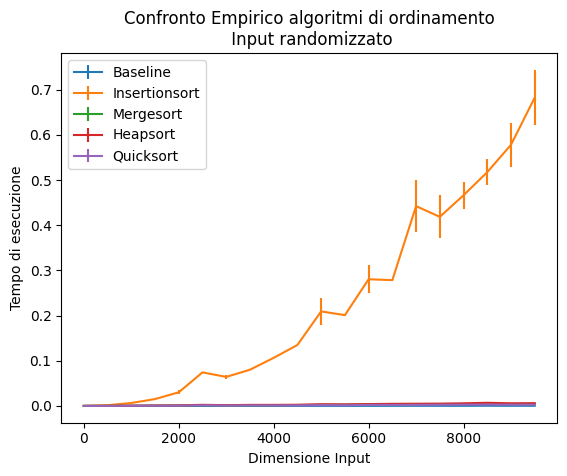

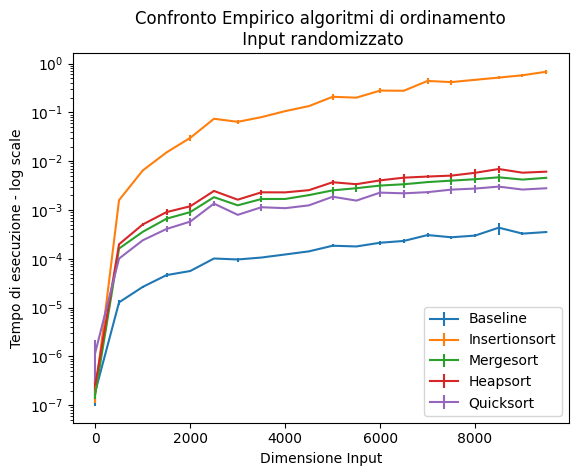

In [ ]:
plt.errorbar(ranges,[ avg for (avg, std) in times_baseline], yerr = [ std/2 for (avg, std) in times_baseline] , label = 'Baseline')
plt.errorbar(ranges,[ avg for (avg, std) in times_insertion], yerr = [ std/2 for (avg, std) in times_insertion] , label = 'Insertionsort')
plt.errorbar(ranges,[ avg for (avg, std) in times_merge], yerr = [ std/2 for (avg, std) in times_merge] , label = 'Mergesort')
plt.errorbar(ranges,[ avg for (avg, std) in times_heap], yerr = [ std/2 for (avg, std) in times_heap] , label = 'Heapsort')
plt.errorbar(ranges,[ avg for (avg, std) in times_quick], yerr = [ std/2 for (avg, std) in times_quick] , label = 'Quicksort')

plt.xlabel('Dimensione Input')
plt.ylabel('Tempo di esecuzione')
plt.title('Confronto Empirico algoritmi di ordinamento\n Input randomizzato')

plt.legend()
plt.show()


plt.errorbar(ranges,[ avg for (avg, std) in times_baseline], yerr = [ std/2 for (avg, std) in times_baseline] , label = 'Baseline')
plt.errorbar(ranges,[ avg for (avg, std) in times_insertion], yerr = [ std/2 for (avg, std) in times_insertion] , label = 'Insertionsort')
plt.errorbar(ranges,[ avg for (avg, std) in times_merge], yerr = [ std/2 for (avg, std) in times_merge] , label = 'Mergesort')
plt.errorbar(ranges,[ avg for (avg, std) in times_heap], yerr = [ std/2 for (avg, std) in times_heap] , label = 'Heapsort')
plt.errorbar(ranges,[ avg for (avg, std) in times_quick], yerr = [ std/2 for (avg, std) in times_quick] , label = 'Quicksort')

plt.xlabel('Dimensione Input')
plt.ylabel('Tempo di esecuzione - log scale')
plt.title('Confronto Empirico algoritmi di ordinamento\n Input randomizzato')


plt.yscale('log')
plt.legend()
plt.show()



###**Input inveriti**###
Non c'è nessun bisogno di ripetere l'esperimento, visto che è tutto deterministico. Inoltre evitiamo di usare quicksort perché la profondità delle chiamate ricorsive supera quella tollerata da Python molto presto.

In [ ]:
times_baseline, times_insertion, times_merge, times_heap = [], [], [], []

ranges = [i * 500 for i in range(20)]


for n in tqdm(ranges):
    test = [i for i in range(n)]
    test.reverse()
    sorted_test = [i for i in range(n)]


    test_baseline, test_insertion, test_merge, test_heap = test[:], test[:], test[:], test[:]

    # Test 0: baseline
    t_0 = time()
    sorted(test_baseline)
    t_1 = time()
    times_baseline.append(t_1 - t_0)

    # Test 1: insertion sort
    t_0 = time()
    insertionSort(test_insertion)
    t_1 = time()
    if test_insertion != sorted_test: print('Error')
    times_insertion.append((t_1 - t_0))

    # Test 2: merge sort
    t_0 = time()
    test_merge = mergeSort(test_merge)
    t_1 = time()
    if test_merge != sorted_test: print('Error')
    times_merge.append((t_1 - t_0))

    # Test 3: heap sort
    t_0 = time()
    heapSort(test_heap)
    t_1 = time()
    if test_heap != sorted_test: print('Error in heapSort')
    times_heap.append((t_1 - t_0))




100%|██████████| 20/20 [00:28<00:00,  1.43s/it]


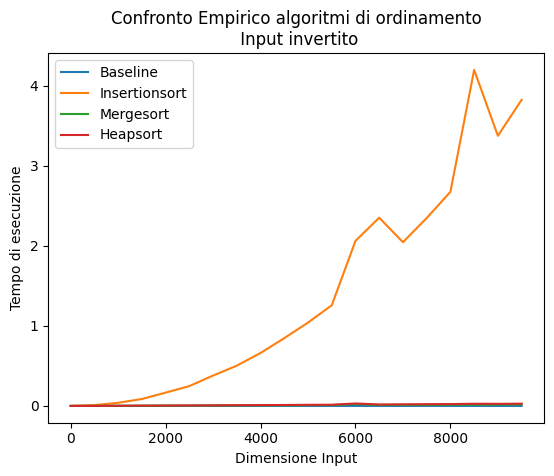

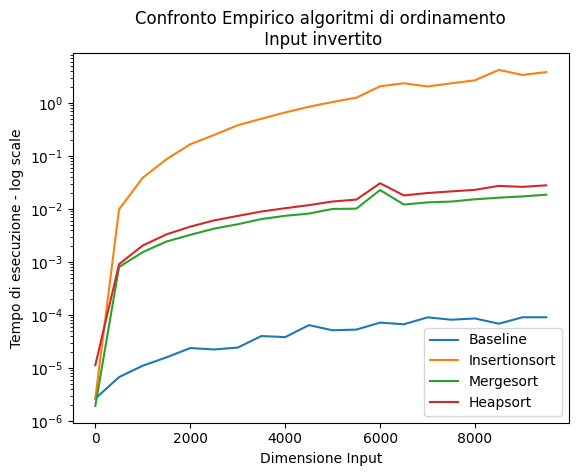

In [ ]:
plt.plot(ranges, times_baseline, label = 'Baseline')
plt.plot(ranges, times_insertion, label = 'Insertionsort')
plt.plot(ranges, times_merge, label = 'Mergesort')
plt.plot(ranges, times_heap, label = 'Heapsort')

plt.xlabel('Dimensione Input')
plt.ylabel('Tempo di esecuzione')
plt.title('Confronto Empirico algoritmi di ordinamento\n Input invertito')

plt.legend()
plt.show()


plt.plot(ranges, times_baseline, label = 'Baseline')
plt.plot(ranges, times_insertion, label = 'Insertionsort')
plt.plot(ranges, times_merge, label = 'Mergesort')
plt.plot(ranges, times_heap, label = 'Heapsort')

plt.xlabel('Dimensione Input')
plt.ylabel('Tempo di esecuzione - log scale')
plt.title('Confronto Empirico algoritmi di ordinamento\n Input invertito')


plt.yscale('log')
plt.legend()
plt.show()

